In [3]:
import pandas as pd

# Replace 'your_file.xlsx' with the actual file path
file_path = 'merged_data.xlsx'

# Load Excel file into a DataFrame
df = pd.read_excel(file_path,parse_dates=["Date"],index_col='Date')
df = df.drop(columns=['High', 'Low', 'Open', 'Dividends', 'Stock Splits', 'Price/BV (X)'])
df

,Close,Volume,Basic EPS (Rs.),Total Debt/Equity (X),Book Value [ExclRevalReserve]/Share (Rs.),RBI Repo Rate
Date,,,,,,
2018-08-23,1233.844604,8043652,96.90,0.35,886.83,6.0
2018-08-24,1241.668701,6715059,96.90,0.35,886.83,6.0
2018-08-27,1255.276001,5624995,96.90,0.35,886.83,6.0
2018-08-28,1282.004761,8777168,96.90,0.35,886.83,6.0
2018-08-29,1257.900269,11182203,96.90,0.35,886.83,6.0
...,...,...,...,...,...,...
2023-08-17,2529.066162,6836872,65.34,0.45,708.19,6.5
2023-08-18,2547.800049,9319989,65.34,0.45,708.19,6.5
2023-08-21,2520.000000,4610873,65.34,0.45,708.19,6.5


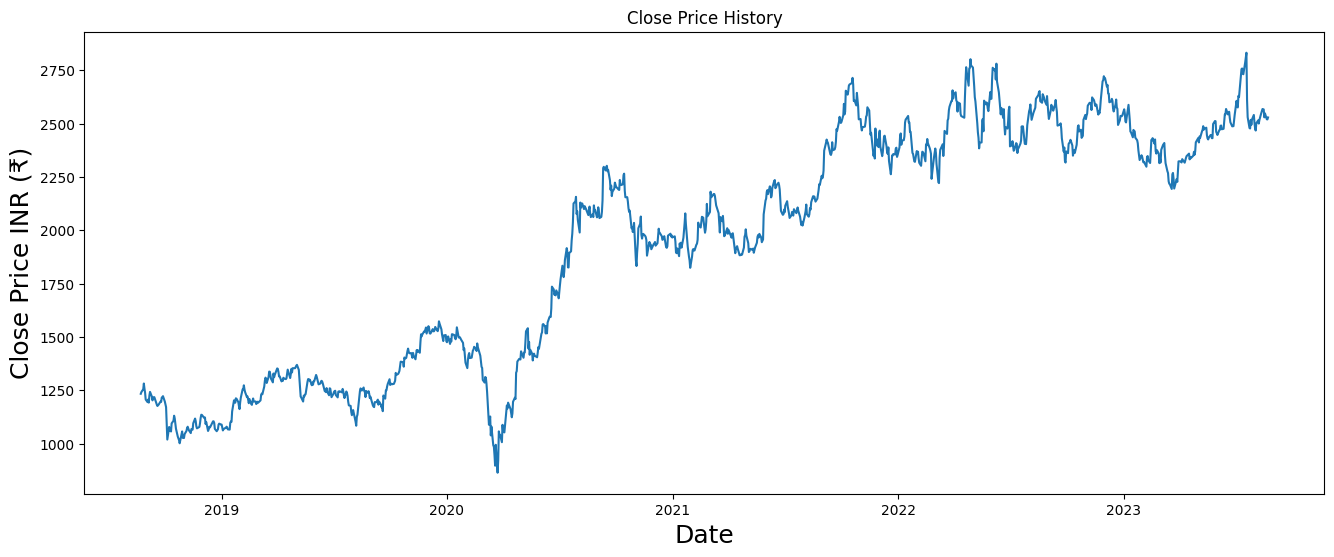

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (₹)', fontsize=18)
plt.show()

In [5]:
import numpy as np
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .60 ))

training_data_len

741

In [6]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.18793865],
       [0.19191464],
       [0.1988295 ],
       ...,
       [0.84152797],
       [0.84122301],
       [0.8458983 ]])

In [7]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.18793865, 0.19191464, 0.1988295 , 0.21241233, 0.20016308,
       0.19040817, 0.17420768, 0.16803355, 0.17435575, 0.16697168,
       0.18396247, 0.19245793, 0.18122124, 0.17225663, 0.17956664,
       0.17988772, 0.16642839, 0.16210657, 0.1589455 , 0.16227945,
       0.16946595, 0.16874979, 0.17902341, 0.18018405, 0.18225849,
       0.16929319, 0.15615489, 0.11523351, 0.07897991, 0.10888681,
       0.09932947, 0.10528115, 0.09821809, 0.11735745, 0.12387716,
       0.13575601, 0.12958189, 0.104886  , 0.08579602, 0.0818694 ,
       0.0774487 , 0.07006462, 0.07702889, 0.09821809, 0.08300535,
       0.08510454, 0.08263495, 0.09184639, 0.09945292, 0.10626896,
       0.10952878, 0.10100864, 0.09436548, 0.10397226, 0.1032314 ,
       0.10268799, 0.11777735, 0.12893991, 0.12271647, 0.11061541])]
[0.10565160907720145]

[array([0.18793865, 0.19191464, 0.1988295 , 0.21241233, 0.20016308,
       0.19040817, 0.17420768, 0.16803355, 0.17435575, 0.16697168,
       0.18396247, 0.19245793, 0.18

In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
681/681 [==============================] - 16s 23ms/step - loss: 0.0010
Epoch 2/20
681/681 [==============================] - 28s 40ms/step - loss: 9.3589e-04
Epoch 3/20
681/681 [==============================] - 28s 42ms/step - loss: 6.4313e-04
Epoch 4/20
681/681 [==============================] - 24s 35ms/step - loss: 5.8914e-04
Epoch 5/20
681/681 [==============================] - 23s 34ms/step - loss: 5.2692e-04
Epoch 6/20
681/681 [==============================] - 24s 35ms/step - loss: 5.9116e-04
Epoch 7/20
681/681 [==============================] - 25s 37ms/step - loss: 6.6351e-04
Epoch 8/20
681/681 [==============================] - 23s 33ms/step - loss: 5.8122e-04
Epoch 9/20
681/681 [==============================] - 19s 28ms/step - loss: 5.6094e-04
Epoch 10/20
681/681 [==============================] - 18s 27ms/step - loss: 5.6823e-04
Epoch 11/20
681/681 [==============================] - 17s 25ms/step - loss: 5.8265e-04
Epoch 12/20
681/681 [========================

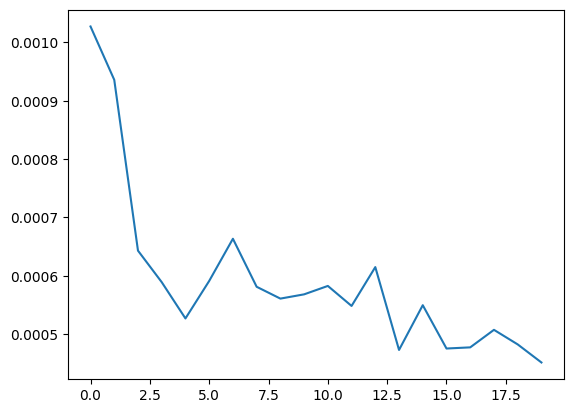

In [18]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [19]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

16/16 [==============================] - 1s 33ms/step


45.31080318424232

C:\Users\Praveen\AppData\Local\Temp\ipykernel_20888\2694165893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


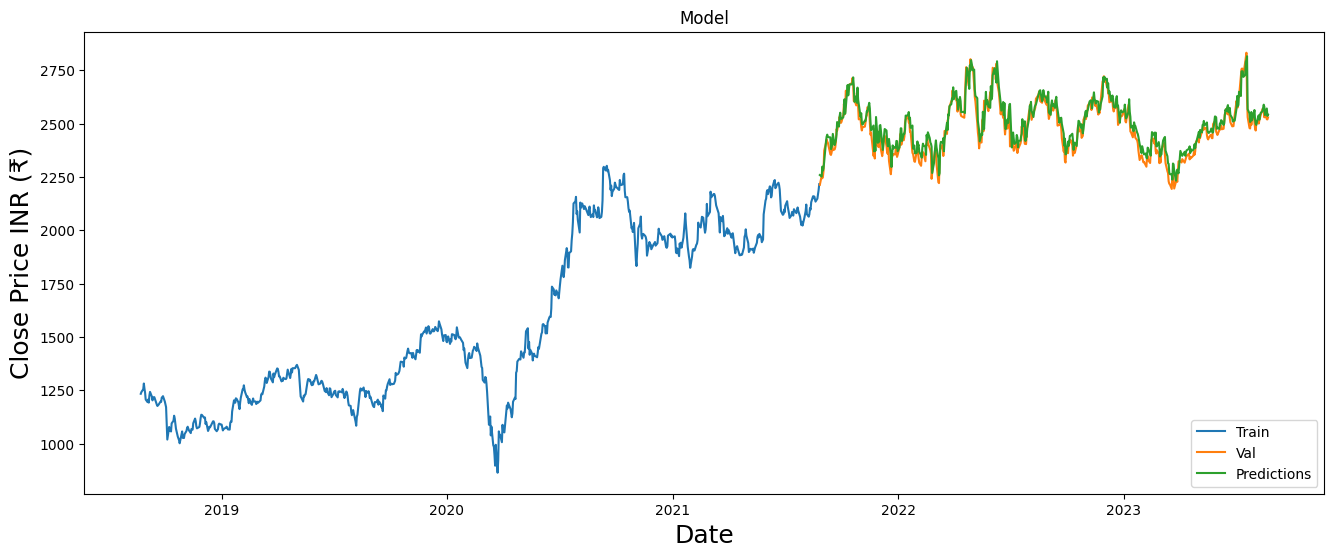

In [20]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (₹)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [21]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-08-27,2212.896973,2258.851807
2021-08-30,2255.468018,2251.560547
2021-08-31,2243.446777,2298.083252
2021-09-01,2252.338623,2279.335938
2021-09-02,2279.460938,2290.977539
...,...,...
2023-08-17,2529.066162,2578.677490
2023-08-18,2547.800049,2539.800049
2023-08-21,2520.000000,2570.712158


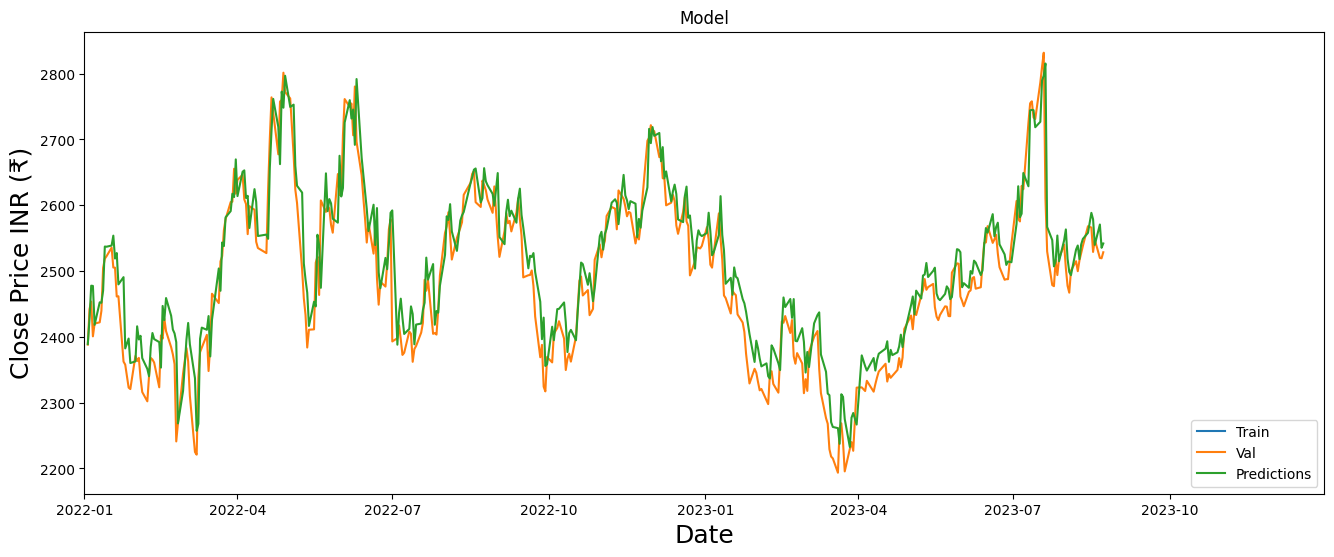

In [22]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Assuming you have 'train', 'valid', and 'predictions' dataframes

# Convert the index to datetime if it's not already in datetime format
train.index = pd.to_datetime(train.index)
valid.index = pd.to_datetime(valid.index)

# Specify the start and end dates for the range you want to plot
start_date = '2022-01-01'  # Start date in YYYY-MM-DD format
end_date = '2023-12-31'    # End date in YYYY-MM-DD format

# Filter the data based on the specified date range
train_range = train[(train.index >= start_date) & (train.index <= end_date)]
valid_range = valid[(valid.index >= start_date) & (valid.index <= end_date)]

# Plot the data within the specified date range
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (₹)', fontsize=18)
plt.plot(train_range['Close'])
plt.plot(valid_range[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

# Set the x-axis limits to the specified date range
plt.xlim(pd.Timestamp(start_date), pd.Timestamp(end_date))

plt.show()
